In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
print(df.Gender.value_counts())
print("******************")
#checking duplicates
print(df.duplicated().sum())
print("******************")
#checking the number of null values
print(df.isna().sum())
print("******************")


Female    112
Male       88
Name: Gender, dtype: int64
******************
0
******************
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
******************


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

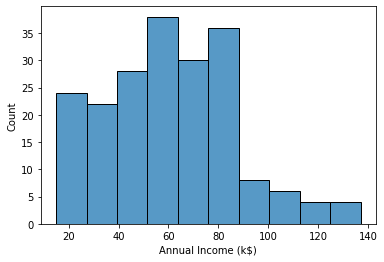

In [3]:
sns.histplot(df["Annual Income (k$)"])

our Annual income is positively skewed ,which means most of the Annual income lies between 20-80 K but there is a small number of people who than 80 K.

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

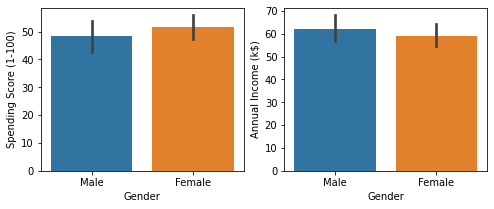

In [4]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.barplot(x=df.Gender,y=df['Spending Score (1-100)'])
plt.subplot(1,2,2)
sns.barplot(x=df.Gender,y=df["Annual Income (k$)"])

Male are earning more but the spending score of women is higher.

### Exploratory data analysis

<AxesSubplot:xlabel='CustomerID', ylabel='Spending Score (1-100)'>

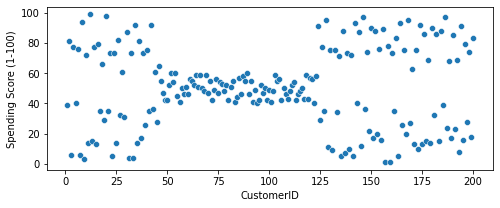

In [5]:
plt.figure(figsize=(8,3))
sns.scatterplot(df.CustomerID,df['Spending Score (1-100)'])

The data is kind of divided between 5 groups of customer depending on their spending score

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

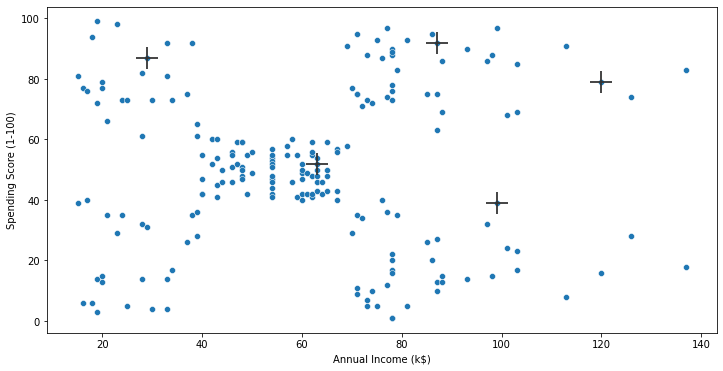

In [6]:
#to check how the centroid will look let's start with K =3
plt.figure(figsize=(12,6))
#data=df[["CustomerID","Spending Score (1-100)","Age"]]
Centroid=df.sample(n=5)
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)")
sns.scatterplot(Centroid["Annual Income (k$)"],Centroid["Spending Score (1-100)"] ,s=500, color=".2", marker="+")

These centroids are purely random and everytime we run the above code ,we might get diffrent centroid location.

<Figure size 2160x720 with 0 Axes>

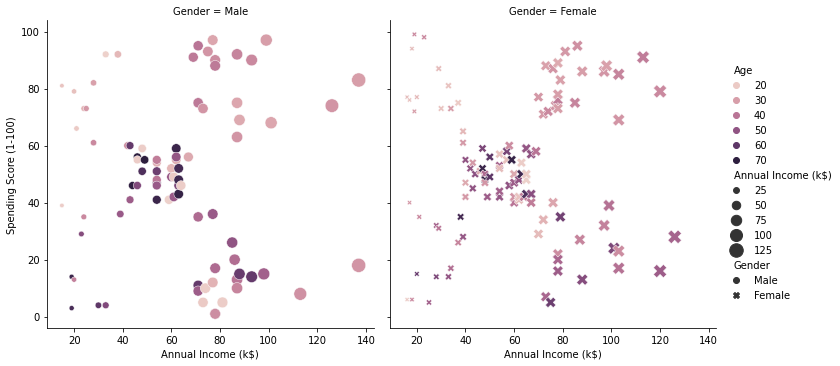

In [7]:
plt.figure(figsize=(30,10))
sns.relplot(
    data=df, x="Annual Income (k$)", y="Spending Score (1-100)",
    col="Gender",hue="Age", size="Annual Income (k$)",
    sizes=(20, 200), style="Gender",
    kind="scatter"
)
sns.set(rc={'figure.figsize':(10,10)})

Analysis:
1> Female who are earning more tends to spend more.
2> People is their 30s and 40s spend more than the resy of the population


In [8]:
df1=pd.get_dummies(data=df,columns=['Gender'],drop_first=True)

In [9]:
#defining the x
x=df1.iloc[:,1:]
y=df1.iloc[:,[2,3]].values
#df1.iloc[:,[2,3]]


In [10]:
#Scaling
from sklearn.preprocessing import StandardScaler
stdScaler=StandardScaler()
x_std=stdScaler.fit_transform(y)


In [11]:
#building and fitting the model

from sklearn.cluster import KMeans
clModel=KMeans(n_clusters=5,init="random",random_state=50)
clModel.fit(x_std)

KMeans(init='random', n_clusters=5, random_state=50)

In [12]:
#predicting the model
predic=clModel.predict(x_std)
predic

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [13]:
#Inertia shows us the sum of distances to each cluster center
clModel.inertia_

65.56840815571681

In [14]:
#adding the prediction data to the df
df['Cluster']=pd.DataFrame(predic, columns=['cluster'] )
#df.head()
df.Cluster.value_counts()
clModel.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907]])

<AxesSubplot:>

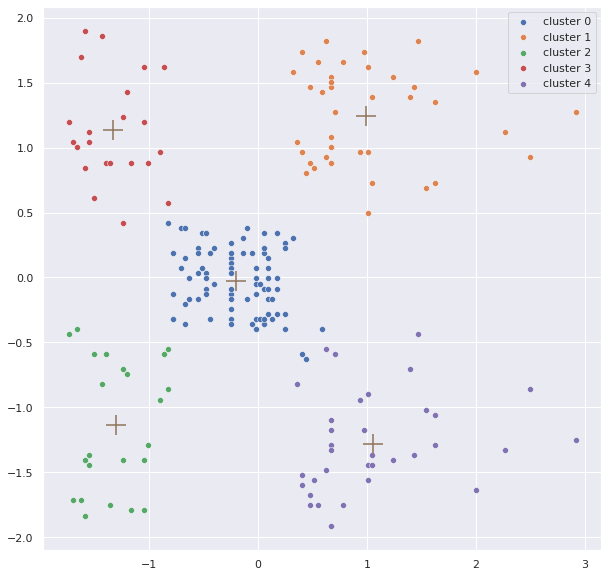

In [15]:
sns.scatterplot(x_std[predic==0,0],x_std[predic==0,1],label="cluster 0")
sns.scatterplot(x_std[predic==1,0],x_std[predic==1,1],label="cluster 1")
sns.scatterplot(x_std[predic==2,0],x_std[predic==2,1],label="cluster 2")
sns.scatterplot(x_std[predic==3,0],x_std[predic==3,1],label="cluster 3")
sns.scatterplot(x_std[predic==4,0],x_std[predic==4,1],label="cluster 4")
sns.scatterplot(clModel.cluster_centers_[:,0], clModel.cluster_centers_[:,1],s=400,marker='+')

In [16]:
#There are 2 methods to determone the number of clusters :
#1>Elbow method: it is more for decision making as it gives a clear piture ,which value should we consider
#2> Silhouette method: it is more of a validation for elbow method.you can check if the the K value from the elbow method is optimal or not

#1>Elbow method:
var=[]
for k in range(1,11):
    clModel=KMeans(n_clusters=k,random_state=50)
    clModel.fit(x_std)
    var.append(clModel.inertia_)

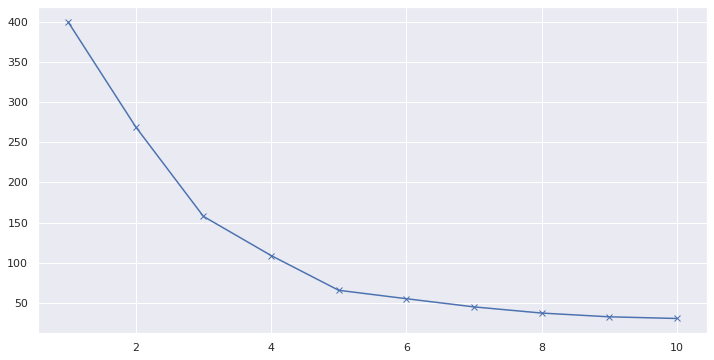

In [17]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),var,marker="x")
#plt.scatter(5,var[4], s = 200, c = 'green', marker='o')
plt.show()

There is no clear value for elbow method here ,the K value can be 4,5,6 .To get 

Silhouette Score(n=5): 0.5546571631111091


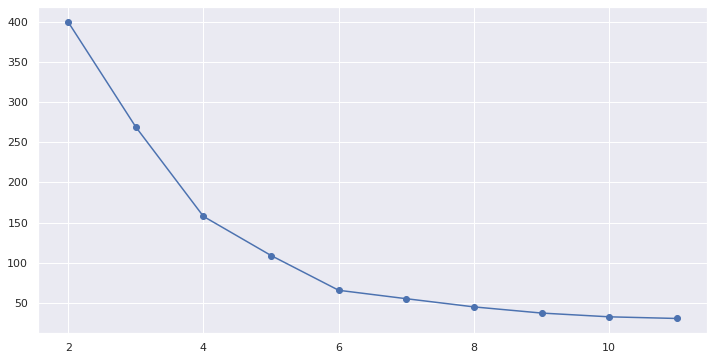

In [18]:
#2> Silhouette method: measures how similar a point is in it's own cluster in comparision to other clusters
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(x_std, predic)}')


silModel = []


# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2,12):
    clModel=KMeans(n_clusters=k).fit(x_std)
    clModel.labels_
    silModel.append(silhouette_score(x_std, clModel.labels_, metric = 'euclidean'))
    
plt.figure(figsize=(12,6))
plt.plot(range(2,12),var,marker="o")
#plt.scatter(6,var[5], s = 500, c = 'green', marker='o')
plt.show()